# Business Analytics Project
## Business Metrics of Yandex.Afisha

I've been offered an internship in the analytical department at Yandex.Afisha. My first task is to help optimize marketing expenses. 

## 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
try:
    visits = pd.read_csv('visits_log_us.csv', nrows=500) 
    orders = pd.read_csv('orders_log_us.csv', nrows=500) 
    costs = pd.read_csv('costs_us.csv', nrows=500)
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500) 
    orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=500) 
    costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)

**Visits**

In [3]:
visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
95,desktop,2018-04-12 18:16:00,3,2018-04-12 18:14:00,11884437754514720009
467,touch,2018-02-19 13:01:00,4,2018-02-19 12:55:00,6167736123649472089
108,desktop,2017-09-05 18:14:00,2,2017-09-05 18:14:00,13744984098033798215
428,desktop,2017-06-28 19:29:00,3,2017-06-28 19:16:00,14112472262022244899
71,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9344114199116964256
314,touch,2017-07-05 14:35:00,5,2017-07-05 14:34:00,5253571368857147466
248,desktop,2018-05-28 23:24:00,4,2018-05-28 23:24:00,13778230787345025324
48,desktop,2018-03-21 21:28:00,4,2018-03-21 21:26:00,8103967464520460149
311,touch,2017-10-01 20:54:00,4,2017-10-01 20:46:00,11610281260154644339
57,desktop,2018-02-04 21:37:00,1,2018-02-04 21:02:00,9161221590185702142


In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [5]:
visits.Device.unique()

array(['touch', 'desktop'], dtype=object)

In [6]:
orders.sample(10)

,Buy Ts,Revenue,Uid
42,2017-06-01 17:27:00,110.00,11218073356336199381
46,2017-06-01 18:11:00,2.44,18346008462625591446
94,2017-06-01 23:00:00,2.20,11274979605518496333
28,2017-06-01 14:26:00,1.34,1306739390297736782
423,2017-06-05 15:40:00,0.30,7358976485213746170
354,2017-06-05 09:00:00,0.61,15639320911091243224
441,2017-06-05 17:49:00,0.30,11814439273040611080
284,2017-06-04 11:42:00,14.67,10116135452198588850
65,2017-06-01 21:02:00,0.49,3738863118490040629
170,2017-06-02 17:10:00,1.83,5046863338319566265


In [7]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [8]:
costs.sample(10)

,source_id,dt,costs
300,1,2018-03-28,63.78
112,1,2017-09-21,55.05
216,1,2018-01-03,88.77
151,1,2017-10-30,97.10
441,2,2017-08-18,51.70
104,1,2017-09-13,49.61
342,1,2018-05-11,33.21
499,2,2017-10-15,125.95
265,1,2018-02-21,77.12
79,1,2017-08-19,23.20


In [9]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


We can optimize all 3 files. For 'visits', we'll change 'Device' to category data type, 'Start Ts' and 'End Ts' to datetime data type. For 'orders', we'll change 'Buy Ts' to datetime data type. For 'costs', we'll change dt to datetime data type.

In [10]:
try:
    visits = pd.read_csv('visits_log_us.csv', dtype={'Device':'category'}, parse_dates = ['Start Ts', 'End Ts'])
    costs = pd.read_csv('costs_us.csv', parse_dates = ['dt'])
    orders = pd.read_csv('orders_log_us.csv', parse_dates = ['Buy Ts'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates = ['Start Ts', 'End Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])
print('Files read successfully')

Files read successfully


We'll convert all column names to lower case and replace spaces with underscore:

In [11]:
visits.columns= visits.columns.str.replace(' ','_').str.lower()
orders.columns= orders.columns.str.replace(' ','_').str.lower()

We'll test the changes:

In [12]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [13]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [14]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Before moving to the next step, we'll check for duplicate rows:

In [15]:
visits.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
costs.duplicated().sum()

0

**We've downloaded the data and optimized it. There are no duplicates or missing values. Column names were converted to lower case. We are ready to move on to the next step.**

## 2. Make reports and calculate metrics:

### 1. Product

* **How many people use it every day, week, and month?**

Calculating total averages:

In [18]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

In [19]:
dau_avg = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_avg = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau_avg = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()

print('The average number of daily active users is', int(dau_avg))
print('The average number of weekly active users is', int(wau_avg))
print('The average number of monthly active users is', int(mau_avg))

The average number of daily active users is 907
The average number of weekly active users is 5621
The average number of monthly active users is 23228


Calculating per device averages:

In [20]:
dau_devices = visits.groupby(['device', 
              'session_date']).agg({'uid':'nunique'}).reset_index().groupby('device').agg({'uid':'mean'}).reset_index()
dau_devices['percent'] = (dau_devices['uid'] / dau_devices['uid'].sum()) * 100
print('The average number of daily active users for each device is:')
dau_devices

The average number of daily active users for each device is:


,device,uid,percent
0,desktop,659.244505,72.331338
1,touch,252.178571,27.668662


Visualizing:

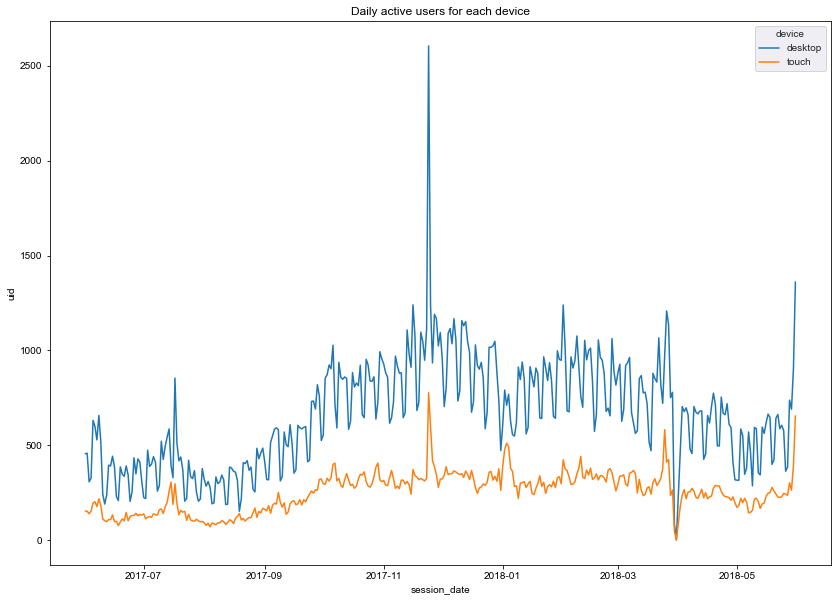

In [21]:
plt.figure(figsize=(14,10))
plt.title('Daily active users for each device')
sns.set_style("darkgrid")
sns.lineplot(data=visits.groupby(['device', 'session_date'])['uid'].nunique().reset_index()
             , x="session_date", y="uid", hue="device")
plt.show()

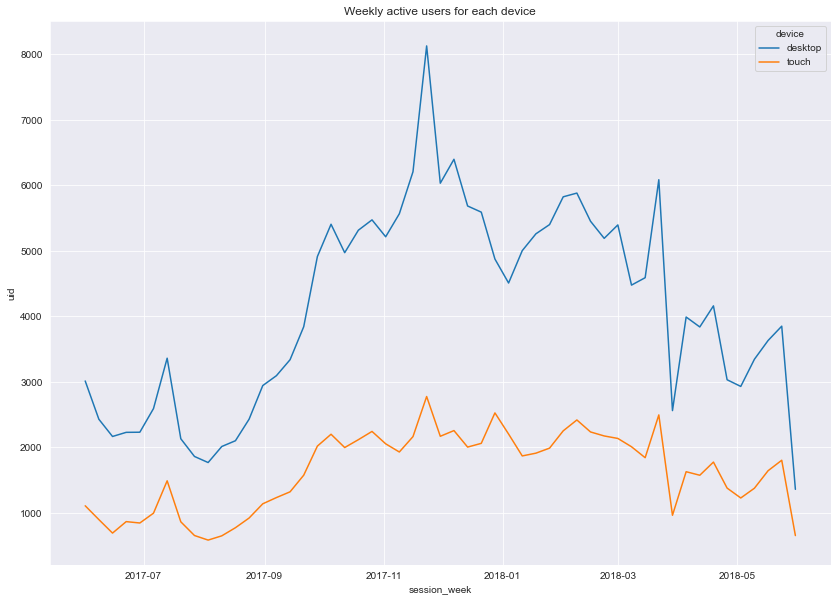

In [22]:
wau_devices = visits.groupby(['device', 'session_week']).agg({'uid':'nunique'}).reset_index()
plt.figure(figsize=(14,10))
plt.title('Weekly active users for each device')
sns.set_style("darkgrid")
sns.lineplot(data=wau_devices, x="session_week", y="uid", hue="device")
plt.show()

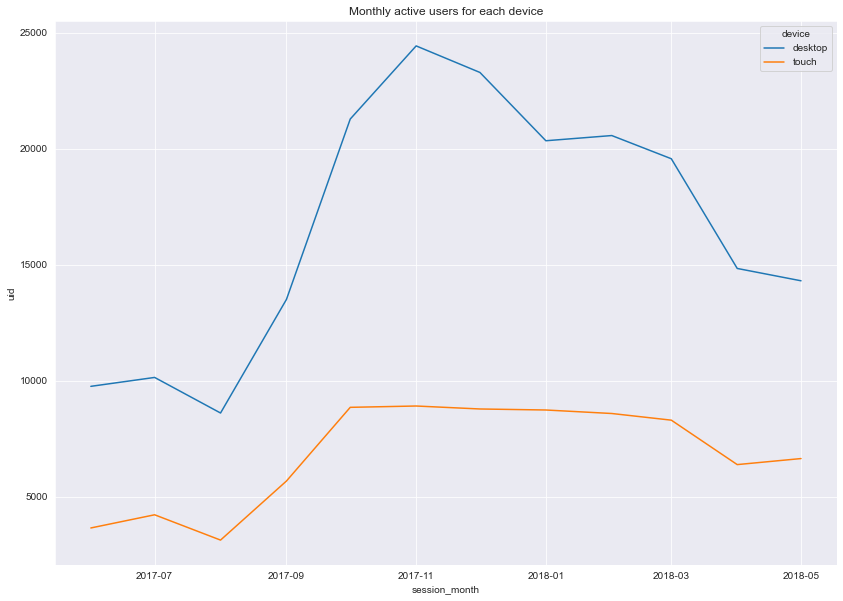

In [23]:
mau_devices = visits.groupby(['device', 'session_month']).agg({'uid':'nunique'}).reset_index()
plt.figure(figsize=(14,10))
plt.title('Monthly active users for each device')
sns.set_style("darkgrid")
sns.lineplot(data=mau_devices, x="session_month", y="uid", hue="device")
plt.show()

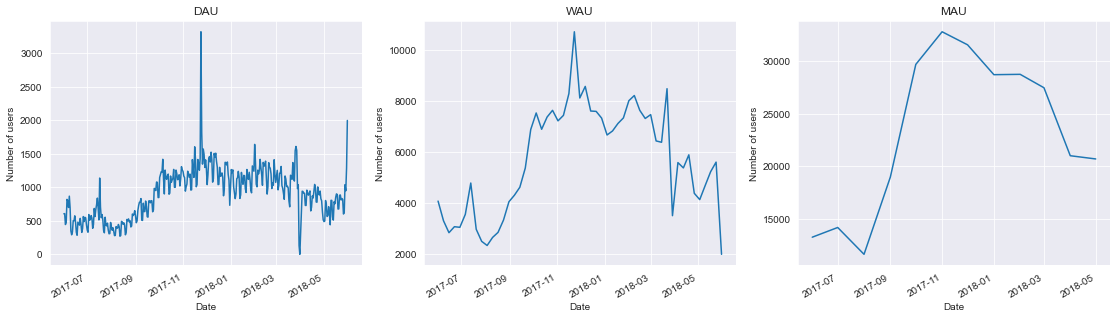

In [24]:
#other type of data
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')

#only week/month
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = visits.groupby('session_week').agg({'uid': 'nunique'})
mau = visits.groupby('session_month').agg({'uid': 'nunique'})

#plots
fig, ax = plt.subplots(1, 3, figsize=(19, 5))
ax[0].plot(dau)
ax[0].set(title = 'DAU', xlabel = 'Date', ylabel = 'Number of users')
ax[1].plot(wau)
ax[1].set(title = 'WAU', xlabel = 'Date', ylabel = 'Number of users')
ax[2].plot(mau)
ax[2].set(title = 'MAU', xlabel = 'Date', ylabel = 'Number of users')
fig.autofmt_xdate(rotation=30)
plt.show()



Calculating per ad source averages:

In [25]:
dau_sources = visits.groupby(['source_id', 
    'session_date']).agg({'uid':'nunique'}).reset_index().groupby('source_id').agg({'uid':'mean'}).reset_index()
dau_sources['percent'] = (dau_sources['uid'] / dau_sources['uid'].sum()) * 100
print('The average number of daily active users from each ad source is:')
dau_sources

The average number of daily active users from each ad source is:


,source_id,uid,percent
0,1,80.557692,8.485028
1,2,120.707989,12.714001
2,3,232.865014,24.527342
3,4,275.454545,29.013237
4,5,175.622590,18.498079
5,6,1.000000,0.105329
6,7,1.058824,0.111524
7,9,36.110193,3.803435
8,10,26.033058,2.742025


Visualizing:

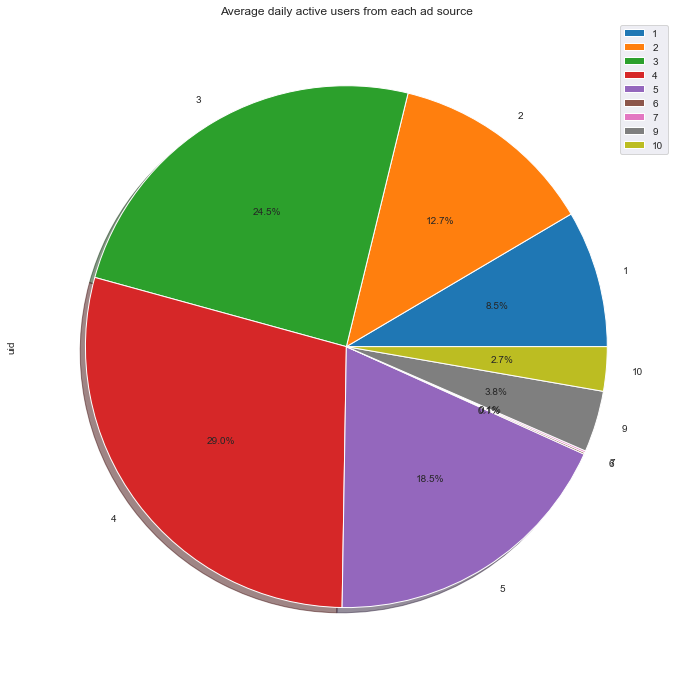

In [26]:
(dau_sources.set_index('source_id')
                .plot(y='uid', kind='pie', 
                      title = "Average daily active users from each ad source", 
                      figsize=(12, 12), autopct='%1.1f%%', shadow=True)
);

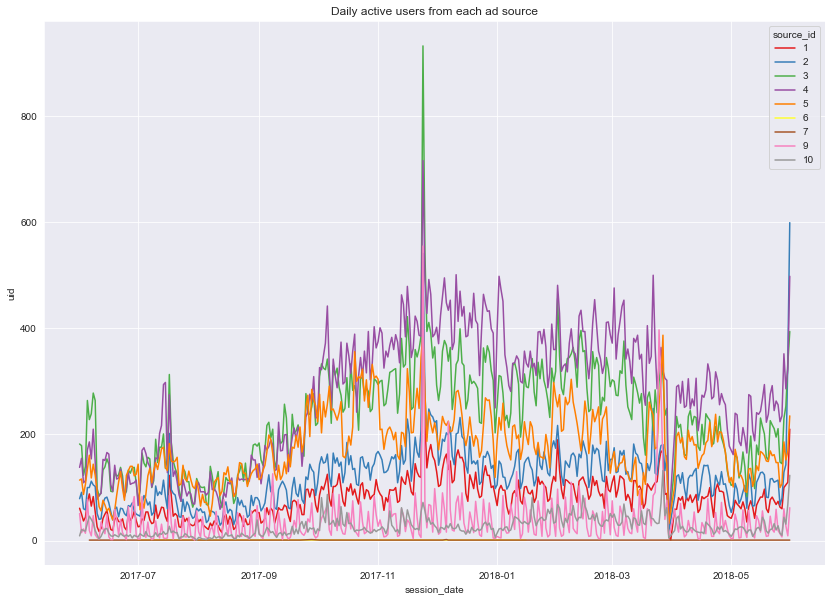

In [27]:
plt.figure(figsize=(14,10))
plt.title('Daily active users from each ad source')
sns.set_style("darkgrid")
sns.lineplot(data=visits.groupby(['source_id', 'session_date'])['uid'].nunique().reset_index(), 
             x="session_date", y="uid", hue="source_id", palette='Set1')
plt.show()

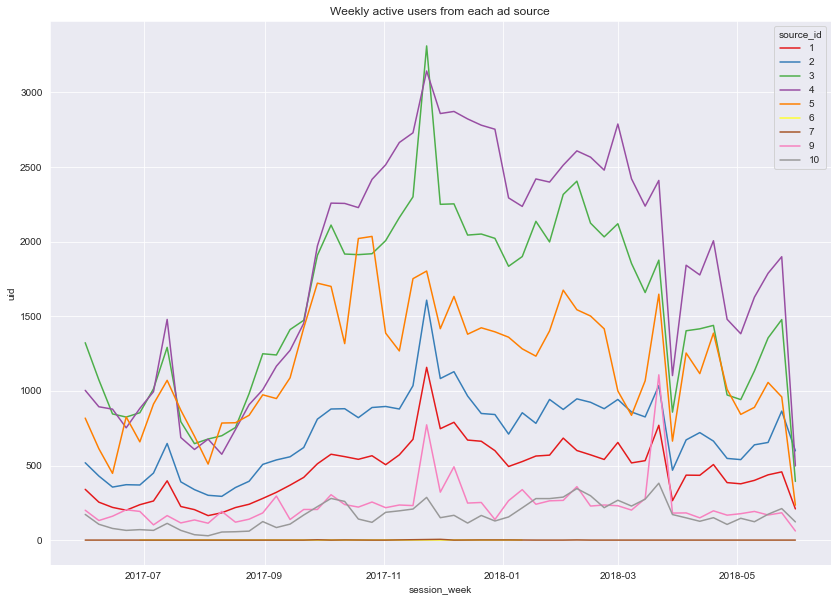

In [28]:
wau_sources = visits.groupby(['source_id', 'session_week']).agg({'uid':'nunique'}).reset_index()
plt.figure(figsize=(14,10))
plt.title('Weekly active users from each ad source')
sns.set_style("darkgrid")
sns.lineplot(data=wau_sources, x="session_week", y="uid", hue="source_id", palette='Set1')
plt.show()

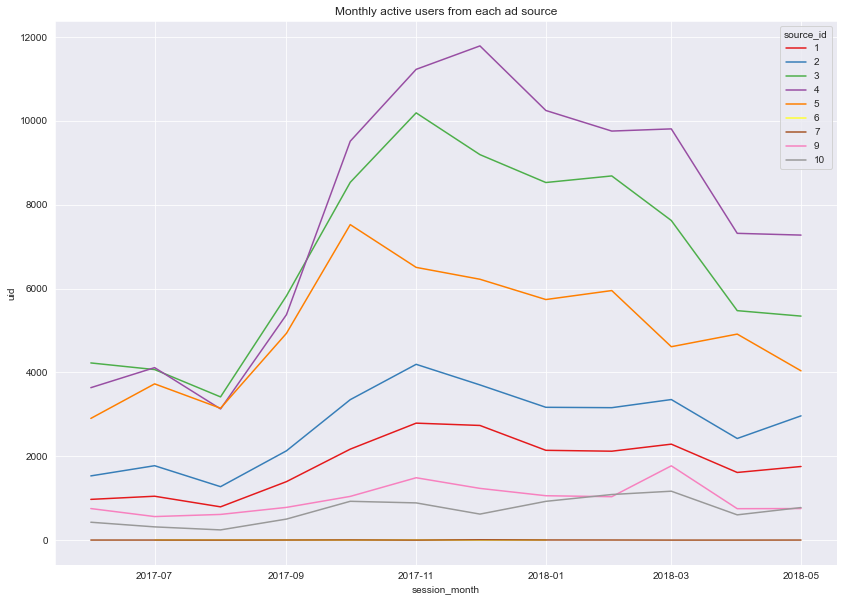

In [29]:
mau_sources = visits.groupby(['source_id', 'session_month']).agg({'uid':'nunique'}).reset_index()
plt.figure(figsize=(14,10))
plt.title('Monthly active users from each ad source')
sns.set_style("darkgrid")
sns.lineplot(data=mau_sources, x="session_month", y="uid", hue="source_id", palette='Set1')
plt.show()

On average, 907 users use Afisha daily, 5716 weekly and 23228 monthly. 72% of the daily users use desktop device while the rest use touch device. Regarding ad sources, there are 5 main sources of active users while the rest 4 are negligible. Sources 1 to 5 used by 93% of the users. Source 4 is the most used with 29% and not far behind source 3 with 24.5%.
Desktop and touch users have almost identical trend of usage regarding dates, weeks and months, but as we can see the amount of desktop users is much higher. The amount of active users is low up until August 17, then is rises all the way up to a spike of around 25,000 on November 17, then the amount of active users trends down. We can see that the holiday season months are the most active months in the year of data we have.

* **How many sessions are there per day? (One user might have more than one session.)**

Calculating average number of sessions per day, per user, per device and per ad source:

In [30]:
sessions_per_day = visits.groupby('session_date').agg({'uid':'count'}).mean()
print('Average sessions per day:', int(sessions_per_day))

Average sessions per day: 987


In [31]:
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print("Average daily sessions per user:",round(sessions_per_user['sessions_per_user'].mean(), 2))

Average daily sessions per user: 1.08


In [32]:
sessions_per_day_devices = visits.groupby(['device','session_date']).agg({'uid':'count'})
sessions_per_day_devices = sessions_per_day_devices.groupby('device').agg({'uid':'mean'}).astype('int')
sessions_per_day_devices['percent'] = (sessions_per_day_devices['uid'] / sessions_per_day_devices['uid'].sum()) * 100
print('The average number of sessions per day from each device:')
sessions_per_day_devices

The average number of sessions per day from each device:


,uid,percent
device,,
desktop,721,73.049645
touch,266,26.950355


In [33]:
sessions_per_day_sources = visits.groupby(['source_id','session_date']).agg({'uid':'count'})
sessions_per_day_sources = sessions_per_day_sources.groupby('source_id').agg({'uid':'mean'}).astype('int').reset_index()
sessions_per_day_sources['percent'] = (sessions_per_day_sources['uid'] / sessions_per_day_sources['uid'].sum()) * 100
print('The average number of sessions per day from each ad source:')
sessions_per_day_sources

The average number of sessions per day from each ad source:


,source_id,uid,percent
0,1,93,9.412955
1,2,131,13.259109
2,3,235,23.785425
3,4,280,28.340081
4,5,184,18.623482
5,6,1,0.101215
6,7,1,0.101215
7,9,36,3.643725
8,10,27,2.732794


Visualizing:

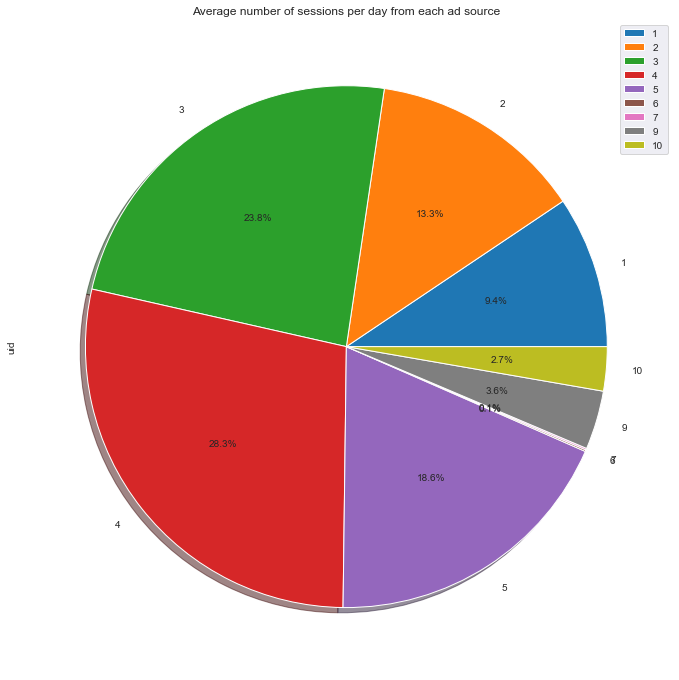

In [34]:
(sessions_per_day_sources.set_index('source_id')
                .plot(y='uid', kind='pie', 
                      title = "Average number of sessions per day from each ad source", 
                      figsize=(12, 12), autopct='%1.1f%%', shadow=True)
);

Same as we have seen in the previous step, desktop leads with 73% of the daily sessions. Ad sources 1 to 5 are the leaders with 93% of the daily sessions.

* **What is the length of each session?**

Calculating average session length:

In [35]:
visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('The average session lasts {} seconds'.format(visits['session_length'].mean()))

The average session lasts 643.506488592098 seconds


Visualizing session length with a histogram:

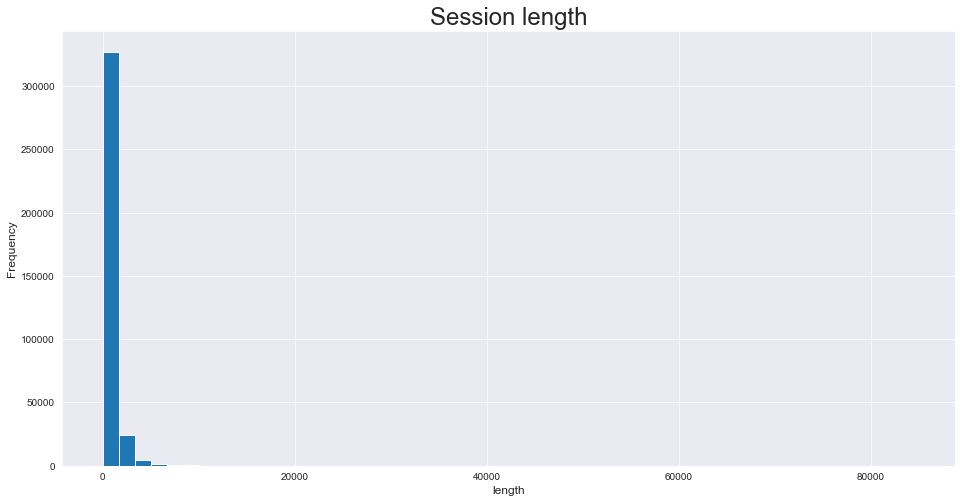

In [36]:
visits['session_length'].hist(bins=50, figsize=(16,8))
plt.title('Session length', size=24)
plt.xlabel('length', size=12)
plt.ylabel('Frequency', size=12);

As we can see, the distribution is skewed and far from normal, so we can't use mean or median to get the average session length. We'll use mode instead.

In [37]:
print("The average session lasts {} seconds.".format(int(visits['session_length'].mode())))

The average session lasts 60 seconds.


In [38]:
length_devices = visits.groupby('device').agg({'session_length':lambda x: x.mode()[0]})
print('The average session length per device:')
length_devices

The average session length per device:


,session_length
device,
desktop,60
touch,60


In [39]:
length_sources = visits.groupby('source_id').agg({'session_length':lambda x: x.mode()[0]})
print('The average session length per ad source:')
length_sources

The average session length per ad source:


,session_length
source_id,
1,60
2,60
3,60
4,60
5,60
6,0
7,120
9,60
10,60


The average session length is 60 seconds for both desktop and touch devices. Ad source number 7 has double the length compared to the rest sources with 120 seconds.

* **How often do users come back?**

Calculating retention and visualizing with a heatmap:

In [40]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')
visits['activity_month'] = visits['start_ts'].astype("datetime64[M]")
visits['first_month'] = visits['first_activity_date'].astype("datetime64[M]")
visits['cohort_lifetime'] = ( visits['activity_month'] - visits['first_month'] ) 
visits['cohort_lifetime'] = (visits[ 'cohort_lifetime' ] / np.timedelta64(1, 'M')).round().astype(int)
cohorts = (visits.groupby(['first_month', 'cohort_lifetime']).agg({'uid': 'nunique'})\
           .reset_index())
initial_visits_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month', 'uid']]
initial_visits_count = initial_visits_count.rename(columns={'uid': 'cohort_users'}) 
cohorts = cohorts.merge(initial_visits_count, on='first_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(index='first_month',columns='cohort_lifetime',values='retention',\
                                      aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


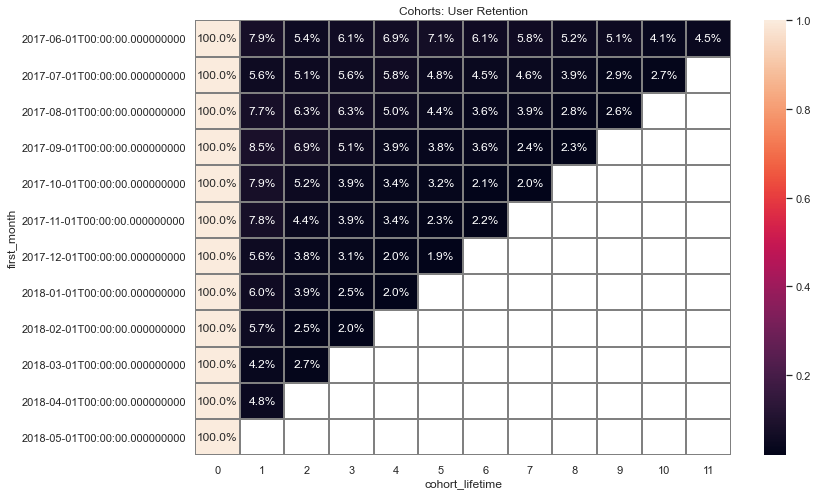

In [41]:
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

Calculating sticky factor:

In [42]:
sticky_wau = dau_avg / wau_avg * 100
sticky_mau = dau_avg / mau_avg * 100
print('Sticky Factor:')
print("Weekly:", round(sticky_wau))
print("Monthly:", round(sticky_mau))

Sticky Factor:
Weekly: uid    16.0
dtype: float64
Monthly: uid    4.0
dtype: float64


Overall, the retention rate is trending down (with few exceptions). Around 16% of the users return in a week, 4% return in a month.

### 2. Sales

* **When do people start buying?**

Calculating conversation category:

In [43]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'
first_order = orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'
first_visit_order = pd.merge(left=first_visit,right=first_order, on ='uid').reset_index()
first_visit_order['time_to_order'] = first_visit_order['first_order'] - first_visit_order['first_visit']
first_visit_order['time_to_order'] = first_visit_order['time_to_order'] / np.timedelta64(1, 'D')
first_visit_order['same_day']= first_visit_order['first_visit'].dt.date == first_visit_order['first_order'].dt.date

def conversion_day(data):
    if data['same_day'] == True:
        return 'Conversion 0d'
    if data['time_to_order'] <= 1:  
        return 'Conversion 1d'
    elif data['time_to_order'] <= 3: 
        return 'Conversion 3d'  
    elif data['time_to_order'] <= 7: 
        return 'Conversion 7d'
    elif data['time_to_order'] <= 14: 
        return 'Conversion 14d'
    elif data['time_to_order'] <= 21: 
        return 'Conversion 21d'
    else:
        return 'Conversion 30d' #30+ days

first_visit_order['conversion_day'] = first_visit_order.apply(conversion_day, axis=1)
first_visit_order['conversion_day'].value_counts()
first_visit_order

,uid,first_visit,first_order,time_to_order,same_day,conversion_day
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106.959722,False,Conversion 30d
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.000000,True,Conversion 0d
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0.054861,True,Conversion 0d
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0.822222,False,Conversion 1d
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.000000,True,Conversion 0d
...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95.814583,False,Conversion 30d
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0.004861,True,Conversion 0d
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231.460417,False,Conversion 30d
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,103.397917,False,Conversion 30d


In [44]:
conversion_day = first_visit_order.groupby('conversion_day').agg({'uid':'nunique'}).reset_index()
conversion_day['percent'] = (conversion_day['uid'] / conversion_day['uid'].sum()) * 100
conversion_day

,conversion_day,uid,percent
0,Conversion 0d,25039,68.556800
1,Conversion 14d,1024,2.803713
2,Conversion 1d,1328,3.636065
3,Conversion 21d,702,1.922076
4,Conversion 30d,5572,15.256140
5,Conversion 3d,1571,4.301399
6,Conversion 7d,1287,3.523807


Visualizing:

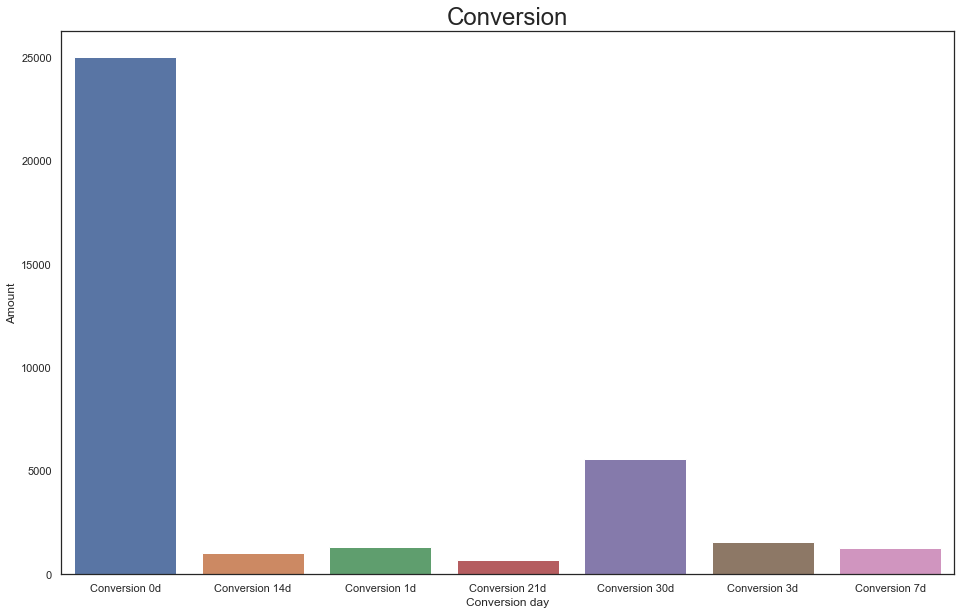

In [45]:
plt.figure(figsize=(16,10))
sns.barplot(x=conversion_day['conversion_day'],y="uid",data = conversion_day)
plt.title('Conversion', size=24)
plt.xlabel('Conversion day', size=12);
plt.ylabel('Amount', size=12);

Most people, almost 70%, start buying in the same day of their registration. 15% wait a month or more before making their first purchase.

* **How many orders do they make during a given period of time?**

Calculating and visualizing:

In [46]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders_amount = orders.pivot_table(index=['order_month'],values='uid',aggfunc='count').reset_index()
orders_amount['percent'] = (orders_amount['uid'] / orders_amount['uid'].sum()) * 100
orders_amount

,order_month,uid,percent
0,2017-06-01,2354,4.669245
1,2017-07-01,2363,4.687097
2,2017-08-01,1807,3.584251
3,2017-09-01,3387,6.718239
4,2017-10-01,5679,11.264505
5,2017-11-01,5659,11.224834
6,2017-12-01,6218,12.333631
7,2018-01-01,4721,9.364277
8,2018-02-01,5281,10.475057
9,2018-03-01,5326,10.564316


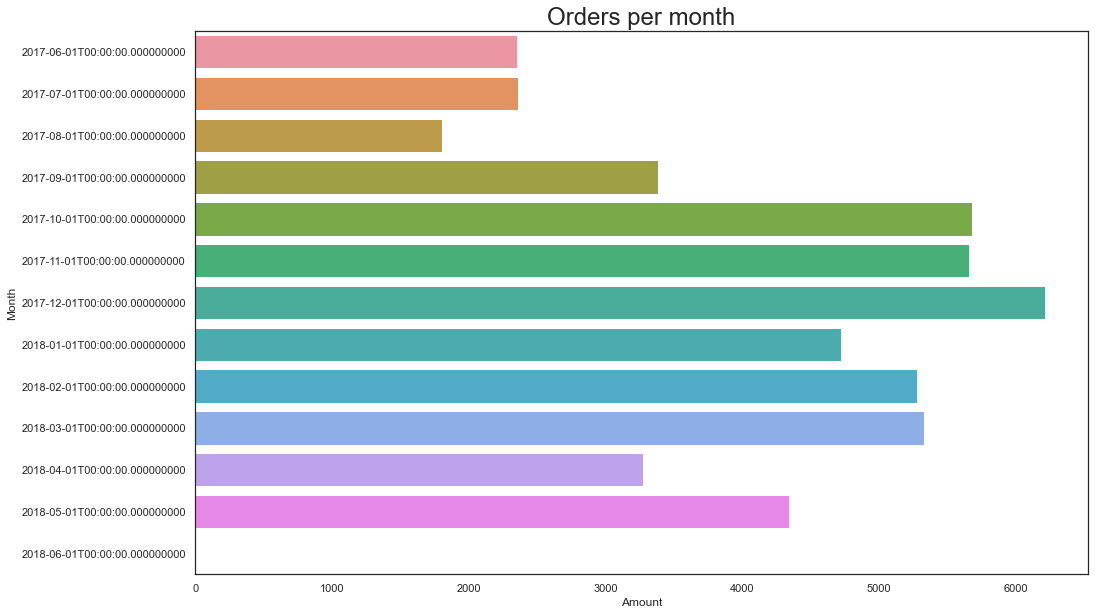

In [47]:
plt.figure(figsize=(16,10)) 
sns.barplot(x="uid",y='order_month',data = orders_amount)
plt.title('Orders per month', size=24)
plt.xlabel('Amount', size=12);
plt.ylabel('Month', size=12);

Users made the most orders in December 2017. Overall the users made most orders in the holiday season - October, November and December. From June to August, the amount of orders is low compared to the rest of the year. 

In [48]:
print('The total amount of orders is:',orders['uid'].count())

The total amount of orders is: 50415


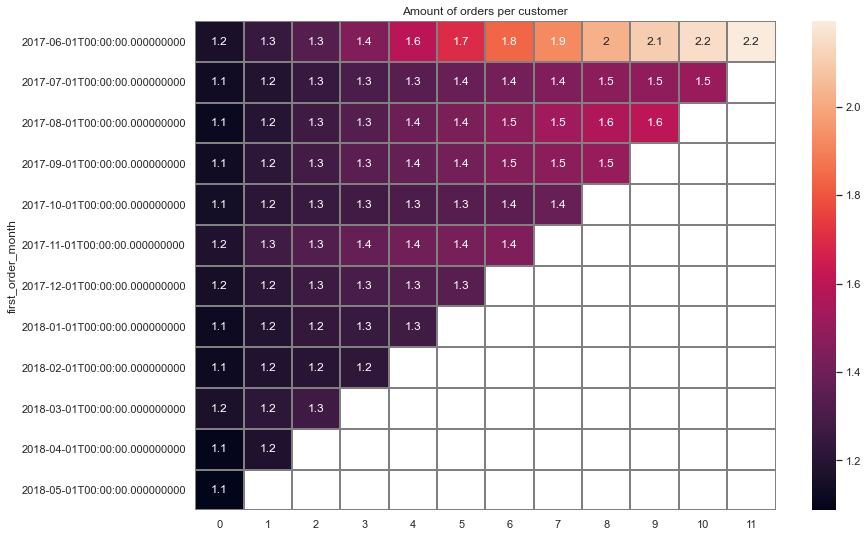

In [49]:
first_order_dates = orders.groupby('uid')['buy_ts'].min()
first_order_dates.name = 'first_order_date'
orders_c = orders.copy()
orders_c = orders_c.join(first_order_dates, on='uid')
orders_c['first_order_month'] = orders_c['first_order_date'].astype('datetime64[M]')
c_sizes = orders_c.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
c_sizes.columns = ['first_order_month', 'n_buyers']
orders_c = orders_c.drop(orders_c[orders_c['first_order_date'] > "2018-06-01 00:00:00"].index)
orders_c = pd.merge(orders_c, c_sizes, on='first_order_month')
orders_c['age'] = (orders_c['order_month'] - orders_c['first_order_month']) / np.timedelta64(1, 'M')
orders_c['age'] = orders_c['age'].round().astype('int')
orders_c_cohorts = orders_c.pivot_table(index='first_order_month', columns='age', values='uid', aggfunc='count')
orders_c_cohorts.fillna('')
orders_per_user_grouped_by_cohorts = orders_c_cohorts.merge(c_sizes, 
                                                                     on='first_order_month').set_index('first_order_month')

orders_per_user_grouped_by_cohorts = orders_per_user_grouped_by_cohorts[[0,1,
                                2,3,4,5,6,7,8,9,10,11]].div(orders_per_user_grouped_by_cohorts.n_buyers, axis=0).round(3)
orders_per_user_grouped_by_cohorts.fillna('')
plt.figure(figsize=(13, 9))
plt.title('Amount of orders per customer')
sns.heatmap(orders_per_user_grouped_by_cohorts.cumsum(axis=1), annot=True, linewidths=1, linecolor='gray')
plt.show()

In [50]:
print('Average number of purchases per customer over 6 months:', orders_per_user_grouped_by_cohorts.cumsum(axis=1).mean(axis=0)[5])

Average number of purchases per customer over 6 months: 1.4341428571428572


* **What is the average purchase size?**

Calculating for each month and device:

In [51]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [52]:
print('The average purchase size is:', round(orders['revenue'].mean(),2)) 

The average purchase size is: 5.0


In [53]:
user_devices = visits[['uid', 'device']]
user_devices = user_devices.drop_duplicates(subset='uid')
user_sources = visits[['uid', 'source_id']]
user_sources = user_sources.drop_duplicates(subset='uid')
orders = orders.merge(user_devices, on='uid')

In [54]:
revenue_devices = orders.pivot_table(index=['order_month'], 
                                         columns='device', values='revenue', aggfunc='mean', margins=True).round(2)
revenue_devices

device,desktop,touch,All
order_month,,,
2017-06-01 00:00:00,4.17,3.52,4.06
2017-07-01 00:00:00,5.30,5.35,5.31
2017-08-01 00:00:00,4.89,4.63,4.85
2017-09-01 00:00:00,5.69,4.16,5.42
2017-10-01 00:00:00,4.98,4.70,4.93
2017-11-01 00:00:00,4.66,5.32,4.78
2017-12-01 00:00:00,6.42,3.33,5.85
2018-01-01 00:00:00,4.26,3.50,4.11
2018-02-01 00:00:00,5.19,3.46,4.84


Visualizing:

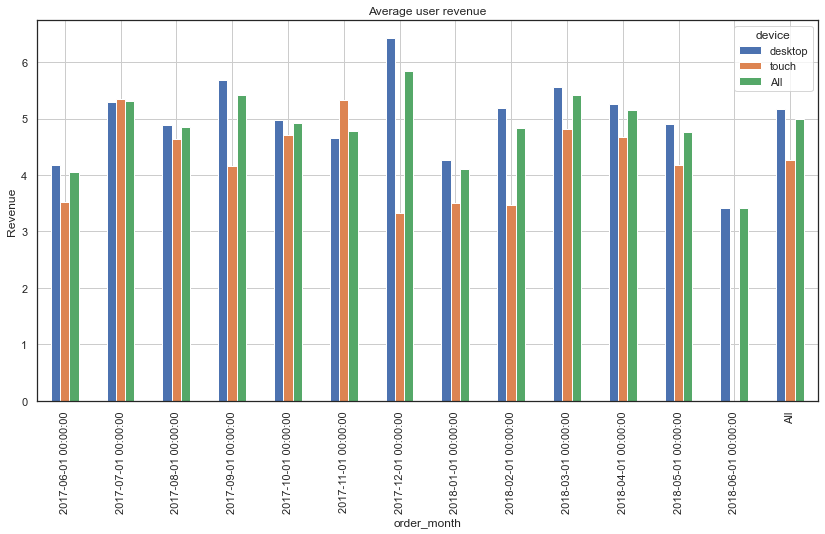

In [55]:
ax = revenue_devices.plot(kind="bar", figsize=(14,7), grid=True , title='Average user revenue')
ax.set_ylabel('Revenue')
plt.show()

Calculating for each month and ad source:

In [56]:
orders = orders.merge(user_sources, on='uid')

In [57]:
revenue_sources = orders.pivot_table(index=['order_month'], 
                                         columns='source_id', values='revenue', aggfunc='mean', margins=True).round(2)
revenue_sources

source_id,1,2,3,4,5,7,9,10,All
order_month,,,,,,,,,
2017-06-01 00:00:00,4.38,4.47,3.97,4.34,4.14,NaN,2.97,1.95,4.06
2017-07-01 00:00:00,6.51,5.89,4.89,5.60,4.60,NaN,4.57,3.16,5.31
2017-08-01 00:00:00,5.05,5.38,5.11,4.41,4.90,1.22,4.10,4.02,4.85
2017-09-01 00:00:00,7.29,7.53,4.67,4.79,4.70,NaN,3.81,2.16,5.42
2017-10-01 00:00:00,5.63,8.11,3.99,4.07,4.79,NaN,3.88,2.45,4.93
2017-11-01 00:00:00,5.76,6.34,4.22,4.50,4.21,NaN,3.49,3.69,4.78
2017-12-01 00:00:00,4.71,14.67,4.00,3.84,4.69,NaN,3.18,3.22,5.85
2018-01-01 00:00:00,5.26,5.81,3.72,3.46,3.78,NaN,2.70,2.89,4.11
2018-02-01 00:00:00,4.84,9.69,3.72,4.10,3.97,NaN,3.27,2.40,4.84


Visualizing:

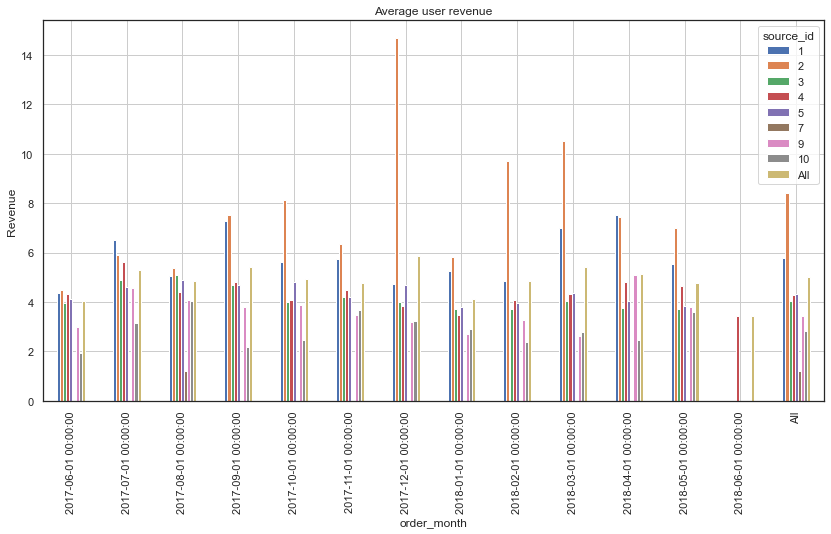

In [58]:
ax = revenue_sources.plot(kind="bar", figsize=(14,7), grid=True , title='Average user revenue')
ax.set_ylabel('Revenue')
plt.show()

Revenue from desktop users is slightly larger than touch users which fit the results from previous steps. Ad source 2 revenues are significantly larger compared to the rest of the sources and source 7 revenues are significantly smaller compared to the rest.

* **How much money do they bring? (LTV)**

Calculating and displaying a heatmap:

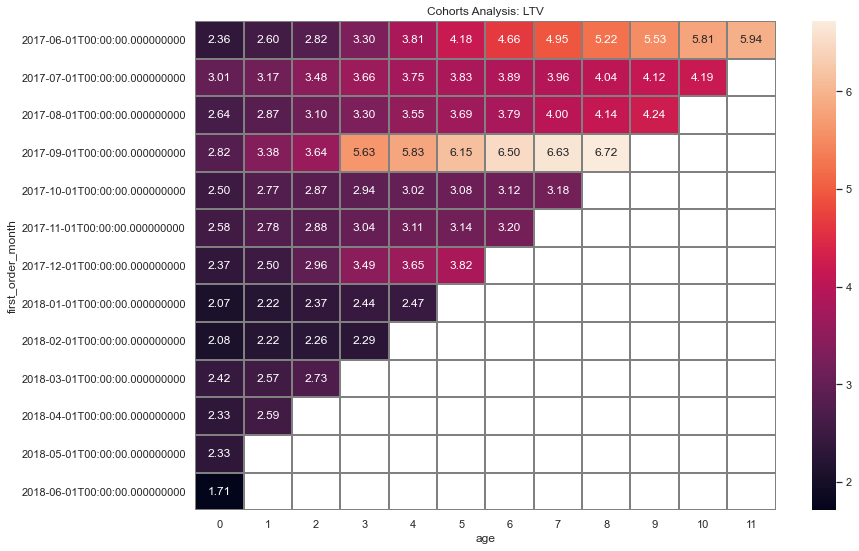

In [59]:
costs['month'] = costs['dt'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

margin_rate = .5
orders_ = pd.merge(orders, first_orders, on='uid')
cohorts = (
    orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

plt.figure(figsize=(13, 9))
plt.title('Cohorts Analysis: LTV')
sns.heatmap(result.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

In [60]:
print('Average LTV for 3 months from the first order:', result.cumsum(axis=1).mean(axis=0)[2])
print('Average LTV for 6 months from the first order:', result.cumsum(axis=1).mean(axis=0)[5])
print('Average LTV for 9 months from the first order:', result.cumsum(axis=1).mean(axis=0)[8])

Average LTV for 3 months from the first order: 2.910905365990179
Average LTV for 6 months from the first order: 3.984526315103668
Average LTV for 9 months from the first order: 5.031041907877478


LTV increasing each lifetime. September 17 cohort is the largest, June 17 is the longest.
If the marketing team want advertisements to pay off in six months, one customer acquisition cannot cost more than $3.984.

### 3. Marketing

* **How much money was spent? Overall/per source/over time**

Calculating costs:

In [61]:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [62]:
costs['month'] = costs['dt'].astype('datetime64[M]')
print('Total money spent:', costs['costs'].sum())

Total money spent: 329131.62


Visualizing:

In [63]:
costs_sources = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum', margins=True)

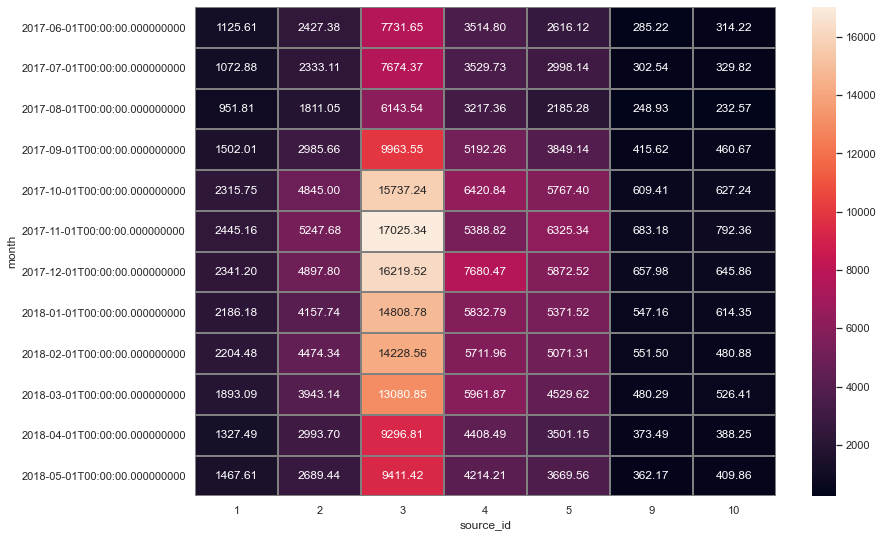

In [64]:
plt.figure(figsize=(13, 9))
sns.heatmap(costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum'), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

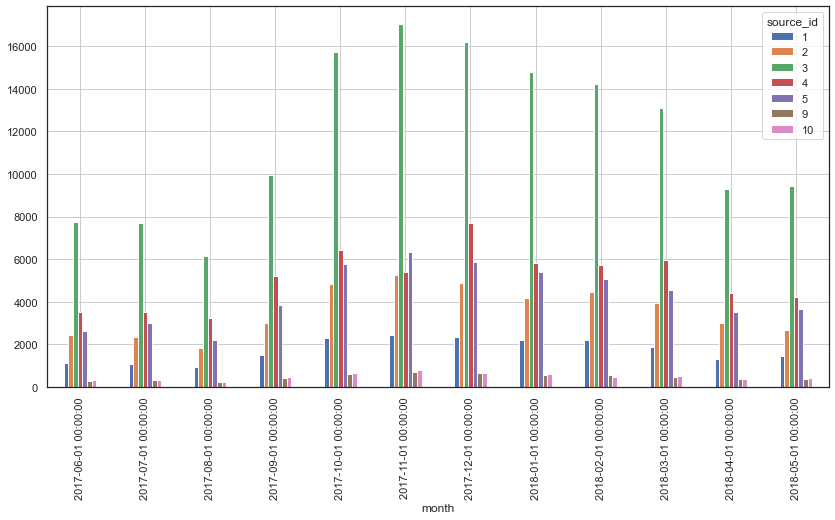

In [65]:
ax = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot(kind="bar", figsize=(14,7), grid=True)
plt.show()

Source 3 costs are far more than any other source. Both sources 9 and 10 are very cheap compared to the rest. The costs are the highest for the holiday season and new year (October to January), then slowly decreases until September.

In [66]:
sc = costs.pivot_table(index='source_id', values='costs', aggfunc='sum')
sc['percent'] = (sc['costs'] / sc['costs'].sum()) * 100
sc

,costs,percent
source_id,,
1,20833.27,6.329769
2,42806.04,13.005751
3,141321.63,42.937725
4,61073.60,18.555981
5,51757.10,15.725350
9,5517.49,1.676378
10,5822.49,1.769046


* **How much did customer acquisition from each of the sources cost?**

Calculating and visualizing:

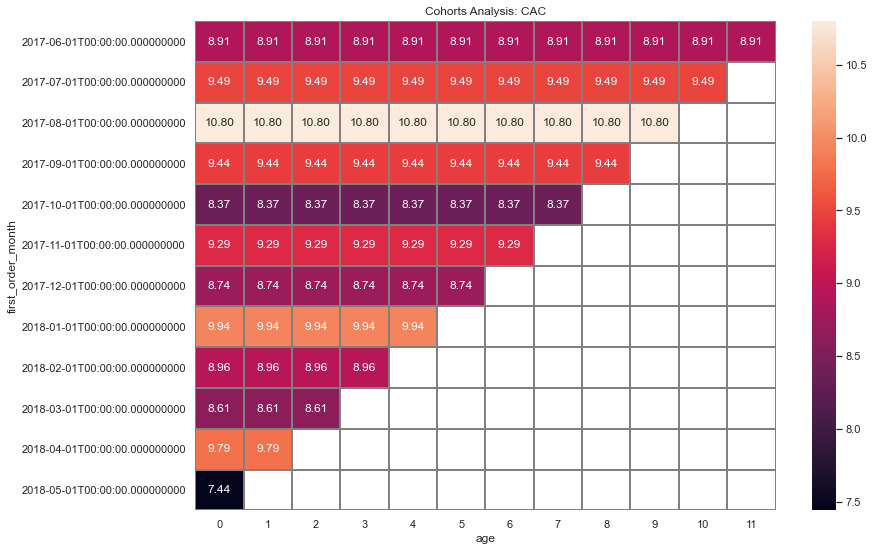

In [67]:
monthly_costs = costs[['costs', 'month']].groupby('month').sum()
report_ = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='month'
)
report_['cac'] = report_['costs'] / report_['n_buyers']
cac_result = report_.pivot_table(
    index='first_order_month', columns='age', values='cac', aggfunc='mean'
)
plt.figure(figsize=(13, 9))
plt.title('Cohorts Analysis: CAC')
sns.heatmap(cac_result.round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

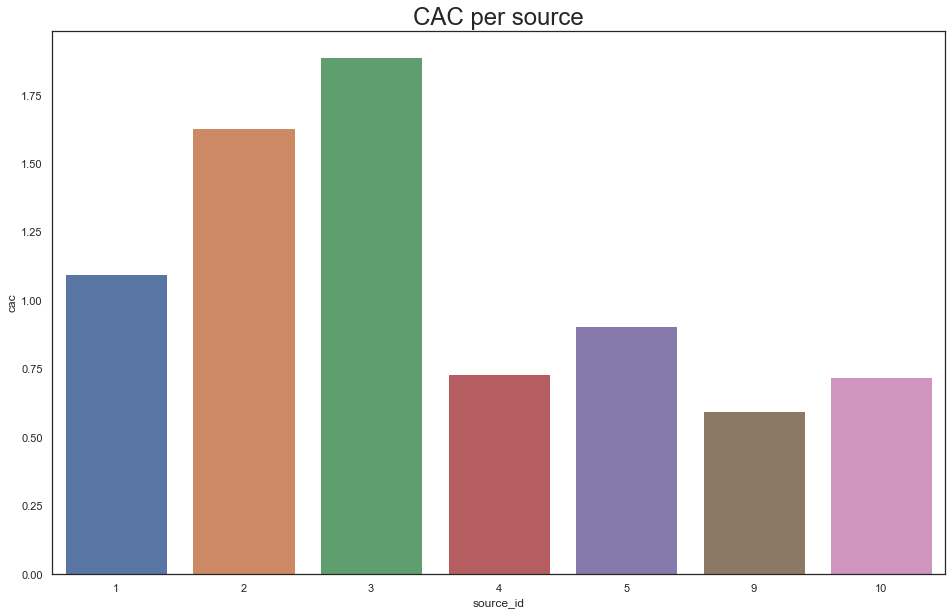

In [68]:
cohort_cac_size = visits.groupby('source_id').agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'n_buyers', 
                                            'source_id': 'source_id'})
source_costs = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
source_cac_table = cohort_cac_size.merge(source_costs, on='source_id')
source_cac_table['cac'] = source_cac_table['costs'] / source_cac_table['n_buyers']
plt.figure(figsize=(16,10))
sns.barplot(x='source_id',y='cac',data = source_cac_table)
plt.title('CAC per source', size=24)
plt.show()

Sources 4 to 10 have a customer acquisition cost below 1. Sources 2 and 3 cost are the most expensive. Source 1 CAC is close to 1.

In [69]:
new1 = visits.groupby('activity_month').agg({'uid':'nunique'}).reset_index().rename(columns={'uid':'customers', 
                                            'activity_month': 'month'})
new2 = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
new3 = new1.merge(new2, on='month')
new3['cac'] = new3['costs'] / new3['customers']
new3

,month,customers,costs,cac
0,2017-06-01,13259,18015.00,1.358700
1,2017-07-01,14183,18240.59,1.286088
2,2017-08-01,11631,14790.54,1.271648
3,2017-09-01,18975,24368.91,1.284264
4,2017-10-01,29692,36322.88,1.223322
5,2017-11-01,32797,37907.88,1.155834
6,2017-12-01,31557,38315.35,1.214163
7,2018-01-01,28716,33518.52,1.167242
8,2018-02-01,28749,32723.03,1.138232
9,2018-03-01,27473,30415.27,1.107097


* **How worthwhile where the investments? (ROI)**

Calculating and visualizing:

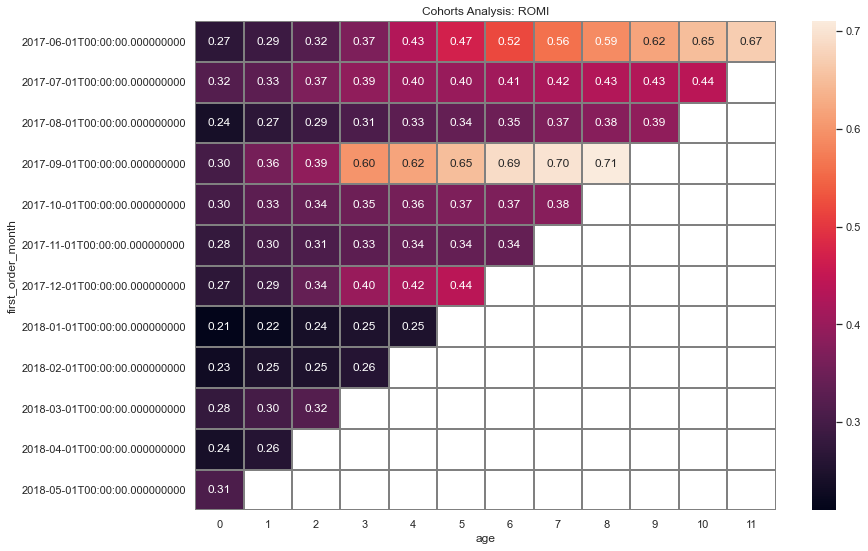

In [70]:
report_['romi'] = report_['ltv'] / report_['cac']
romi_result = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)
plt.figure(figsize=(13, 9))
plt.title('Cohorts Analysis: ROMI')
sns.heatmap(romi_result.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

In [71]:
ROI = (orders.revenue.sum() - costs.costs.sum())/costs.costs.sum()
print("Total Return on Investments: {:.2%}".format(ROI))

Total Return on Investments: -23.42%


Investment haven't paid off. None of the cohorts return the investment. The closest to are September 17 and June 17 cohorts. Rest of the cohorts are below 0.5.

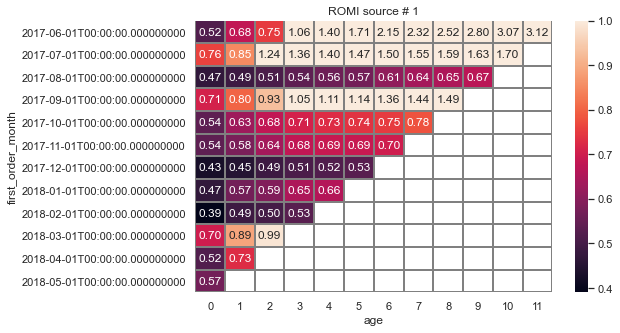

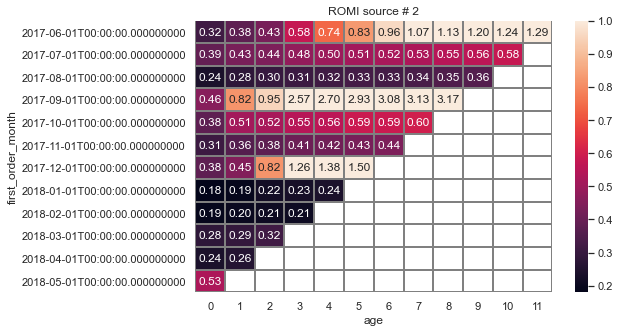

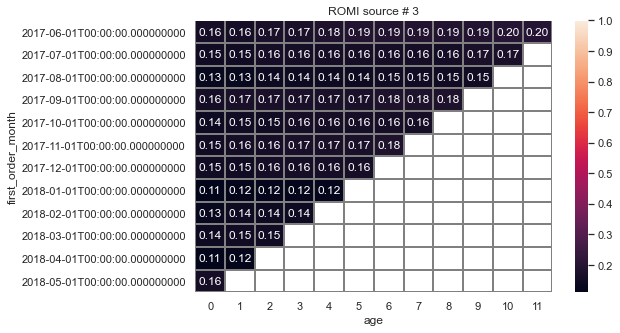

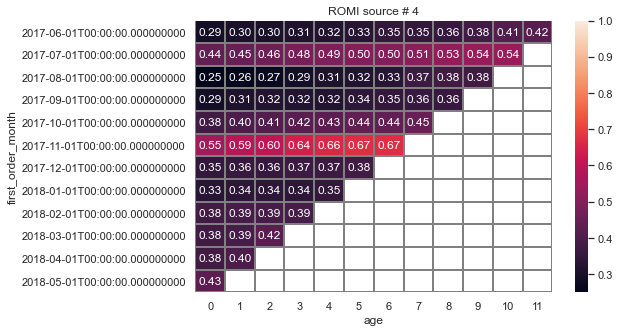

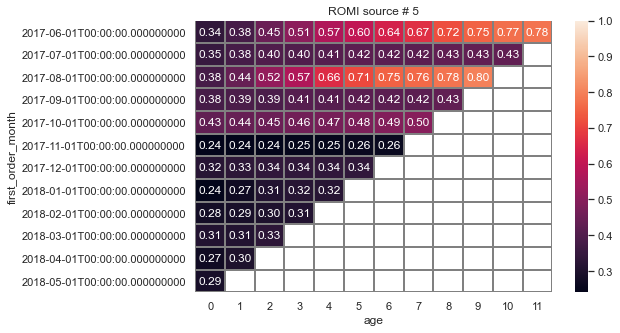

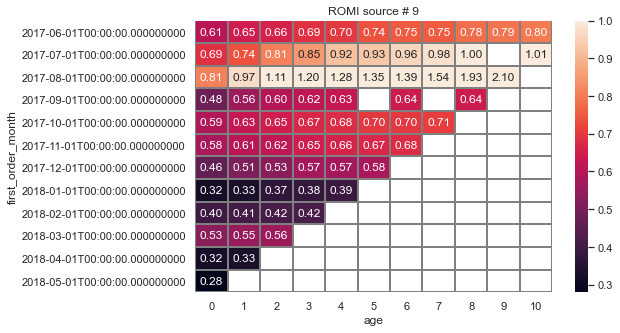

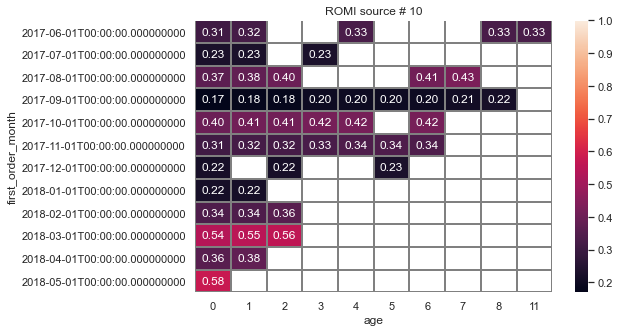

In [72]:
costs_source_monthly = costs.groupby(['month','source_id'])['costs'].sum()
cohort_sizes_2 = orders_.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_2.columns = ['first_order_month','source_id', 'n_buyers']
orders_grouped_by_cohorts_source = orders_.groupby(['first_order_month','order_month', 'source_id']).agg({'revenue':'sum','uid':'nunique'})
orders_grouped_by_cohorts_source = orders_grouped_by_cohorts_source.reset_index()
orders_grouped_by_cohorts_source['age'] = (orders_grouped_by_cohorts_source['order_month'] - orders_grouped_by_cohorts_source['first_order_month'])/ np.timedelta64(1,'M')
orders_grouped_by_cohorts_source['age'] = orders_grouped_by_cohorts_source['age'].round().astype('int')
report_ltv_source = pd.merge(cohort_sizes_2, orders_grouped_by_cohorts_source, on=['first_order_month','source_id'])
margin_rate = 0.5
report_ltv_source['gp'] = report_ltv_source['revenue'] * margin_rate
report_ltv_source['ltv'] = report_ltv_source['gp'] / report_ltv_source['n_buyers']
costs_source_monthly.index.set_names(['first_order_month','source_id'],inplace=True)
report_sources = pd.merge(report_ltv_source, costs_source_monthly, left_on=['first_order_month','source_id'], right_on=['first_order_month','source_id'])
report_sources['cac'] = report_sources['costs'] / report_sources['n_buyers']
report_sources['romi'] = report_sources['ltv'] / report_sources['cac']
sources = visits['source_id'].unique()
sources.sort()
i=0
for source in sources:
    if source == 6 or source == 7:
        continue
    output = report_sources.query("source_id==@source").pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')
    plt.figure(figsize=(8, 5))
    sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax =1)
    plt.title("ROMI source # " + str(source))
    plt.show()
    i = i+1      


### 3. Write a conclusion: advise marketing experts how much money to invest and where.

**Overall conclusions:**

* On average, 907 users use Afisha daily, 5716 weekly and 23228 monthly. 72% of the daily users use desktop device while the rest use touch device. Regarding ad sources, there are 5 main sources of active users while the rest 4 are negligible. Sources 1 to 5 used by 93% of the users. Source 4 is the most used with 29% and not far behind source 3 with 24.5%.
* Regarding number of sessions, desktop leads with 73% of the daily sessions. Ad sources 1 to 5 are the leaders with 93% of the daily sessions.
* Regarding session length, the average session length is 60 seconds for both desktop and touch devices. Ad source number 7 has double the length compared to the rest sources with 120 seconds.
* Regarding retention, the retention rate is trending down (with few exceptions). Around 16% of the users return in a week, around 4% return in a month.
* Regarding users first purchase time, most people, almost 70%, start buying in the same day of their registration. 15% wait a month or more before making their first purchase.
* Regarding amount of orders in a month, users made the most orders in December 2017. Overall the users made most orders in the holiday season - October, November and December. From June to August, the amount of orders is low compared to the rest of the year. 
* Regarding purchase amount, revenue from desktop users is slightly larger than touch users which fit the results from previous steps. Ad source 2 revenues are significantly larger compared to the rest of the sources and source 7 revenues are significantly smaller compared to the rest.
* Regarding LTV, LTV increasing each lifetime. September 17 cohort is the largest, June 17 is the longest.
If the marketing team want advertisements to pay off in six months, one customer acquisition cannot cost more than $3.984.
* Regarding ad costs, source 3 costs are far more than any other source. Both sources 9 and 10 are very cheap compared to the rest. The costs are the highest for the holiday season and new year (October to January), then slowly decreases until September.
* Regarding customer acquisition from each of the sources cost, sources 4 to 10 are the lowest with customer acquisition cost below 1. Sources 2 and 3 cost are the most expensive, close to 2. Source 1 CAC is close to 1.
* Investments haven't paid off. None of the cohorts return the investment. The closest to are September 17 and June 17 cohorts. Rest of the cohorts are below 0.5.

**Advise to marketing experts:**

We'll start with the device. The better devices to invest in is desktop. 72% of the active daily users using Yandex.Afisha from a desktop device. There were more active desktop users in all of the available dates in the data. They made much more orders too. It would be worth to focus on desktop if it fits the company direction, or check why users don't like the touch version. If the company wants to attract more users to the touch device, they should check whether there is a problem in the touch interface or it doesn't comfortable to browse as a desktop device, so need to invest money to make is as nice as the desktop version.

The first order day is the most successful, customers made 70% of their orders in their first day. If that fits the company vision, they can try to improve the result even more and offer special discounts and deals for the first time users to further increase the sales there. They can try to change that with special offers and discounts to the 2nd or further user order.

The retention rate is very low. Customers barely return to order after the first month. The reason is unclear and needs to be checked, in order to increase the retention hence increase profits.

The most recommended ad sources 1 and 2, both are recommended to invest in them as they proved most worth it from the bunch of sources. Company should reduce the investment on source 3 which is the most expensive but the investment doesn't pay off.